# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Support Vector Classifier Strategy Code

In this notebook, you will learn to create a support vector classifier (SVC) algorithm on S&P500. 

SVCs are supervised learning models. A set of training data is provided to the SVC algorithm, each belonging to one of the categories. For instance, the categories can be either to buy or to sell a stock. The algorithm builds a model during the training phase and assigns new data into one of the categories based on the model created during the training phase.


## Import the libraries

In [16]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Read S&P500 data

We will read the S&P500 data from CSV file.

In [3]:
# Fetch the data 
Df = pd.read_csv("data/SPY.csv")
Df= Df.dropna()
Df = Df.set_index(Df.Date)
Df = Df.drop(columns='Date')
Df.head()

,Open,High,Low,Close,Volume
Date,,,,,
03-01-2017,215.6950,216.4522,214.5867,215.8867,91366522
04-01-2017,216.2509,217.3340,216.2413,217.1710,78744433
05-01-2017,216.8739,217.1710,216.1167,216.9985,78379012
06-01-2017,217.1231,218.2924,216.5193,217.7749,71559922
09-01-2017,217.4873,217.6408,217.0141,217.0560,46939676


## Define the explanatory variables

Explanatory variables are used to predict the value of the S&P500 price for the next trading day. The X is a dataset that holds the variables which are used to predict the value of the S&P500, that is, whether the S&P500 index price will go up (1) or go down (-1) tomorrow. The X consists of variables such as 'Open - Close' and 'High - Low'. These can be understood as indicators based on which the algorithm will predict tomorrow's trend. Feel free to add more indicators and see the performance.



In [4]:
# Predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X= Df[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
03-01-2017,-0.1917,1.8655
04-01-2017,-0.9201,1.0927
05-01-2017,-0.1246,1.0543
06-01-2017,-0.6518,1.7731
09-01-2017,0.4313,0.6267


## Define the target variable

Target variable is the outcome which the machine learning model will predict based on the explanatory variables. y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict. If tomorrow's price is greater than today's price then we will buy the S&P500 index, else we will sell the S&P500 index. We will store +1 for a buy signal and -1 for a sell signal in y.

In [5]:
# Target variables
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

## Split the data into train and test

Now, we will split data into training and test data set. 

1. First, 80% of data is used for training and remaining data for testing.
2. X_train and y_train are training dataset.
3. X_test and y_test are test dataset.

In [32]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split] 

# Test data set
X_test = X[split:]
y_test = y[split:]

# Support Vector Classifier (SVC)

We will use SVC() function from sklearn.svm.SVC library to create our classifier model using fit() method on the training data set.

In [33]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

# Classifier accuracy
We will compute the accuracy of the algorithm on the train and test data set by comparing the actual values of Signal with the predicted values of Signal. The function accuracy_score() will be used to calculate the accuracy.

<B>Syntax:</B> accuracy_score(<font color=blue>target_actual_value</font>,<font color=blue>target_predicted_value</font>)
1. <font color=blue>target_actual_value:</font> correct signal values
2. <font color=blue>target_predicted_value:</font> predicted signal values

In [34]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 57.00%
Test Accuracy: 54.90%


An accuracy of 50%+ in test data suggests that the classifier model is effective.

## Strategy implementation

### Predict signal 

We will predict the signal (buy or sell) for the test data set, using the cls.predict() function.

### Compute returns in the test period

We will compute the strategy returns based on the predicted signal, and then save it in the column 'geometric returns' and plot the geometric returns.

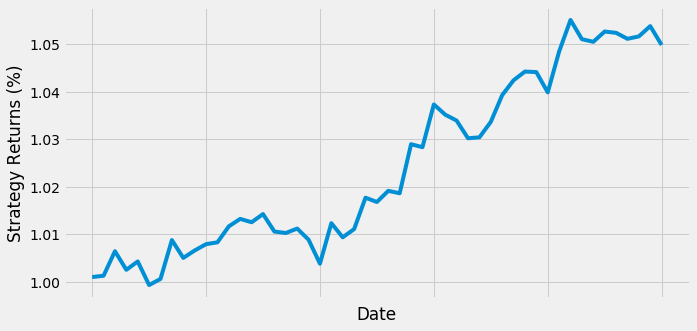

In [35]:
# Predicted Signal
Df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
Df['Return'] = Df.Close.pct_change()

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()

In the upcoming units, there will be interactive exercises to practice these codes.<BR><BR>


## Extending the SVC Demo

### Exploring Train Test Splits

To explore how train test splits affect our classifier accuracy, let's explore all the possible test train splits. Below is a simple for loop that iterates through all the possible split percentages.

In [173]:
def SVCmodel(x):
    split_percentage = (x / 100)
    split = int(split_percentage*len(Df))

    # Train data set
    X_train = X[:split]
    y_train = y[:split] 

    # Test data set
    X_test = X[split:]
    y_test = y[split:]

    # Support vector classifier
    cls = SVC().fit(X_train, y_train)

    # train and test accuracy
    accuracy_train = accuracy_score(y_train, cls.predict(X_train))
    accuracy_test = accuracy_score(y_test, cls.predict(X_test))
    
    print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
    print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

    
def outputSVCmodel():
    # Predicted Signal
    Df['Predicted_Signal'] = cls.predict(X)

    # Calculate daily returns
    Df['Return'] = Df.Close.pct_change()

    # Calculate strategy returns
    Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

    # Calculate geometric returns
    geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

    # Plot geometric returns
    geometric_returns.plot(figsize=(10,5))
    plt.ylabel("Strategy Returns (%)")
    plt.xlabel("Date")
    plt.show()


Train Accuracy: 100.00%
Test Accuracy: 53.01%


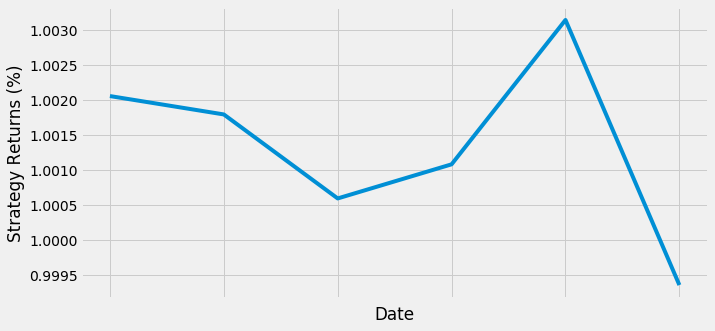


Train Accuracy: 60.00%
Test Accuracy: 43.09%


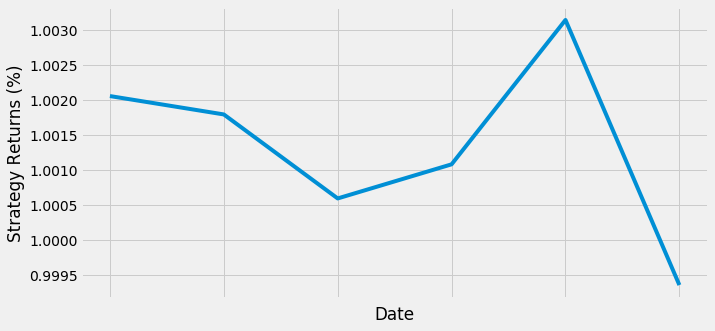


Train Accuracy: 57.14%
Test Accuracy: 43.03%


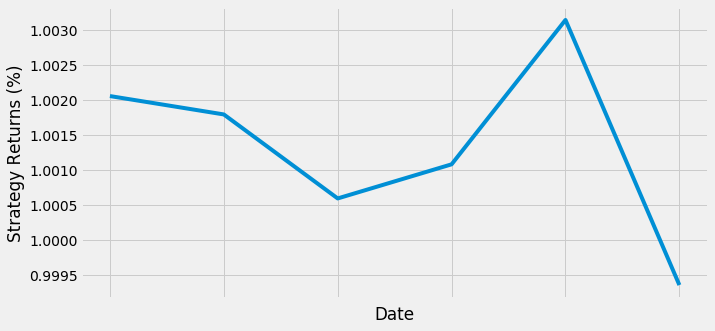


Train Accuracy: 90.00%
Test Accuracy: 54.36%


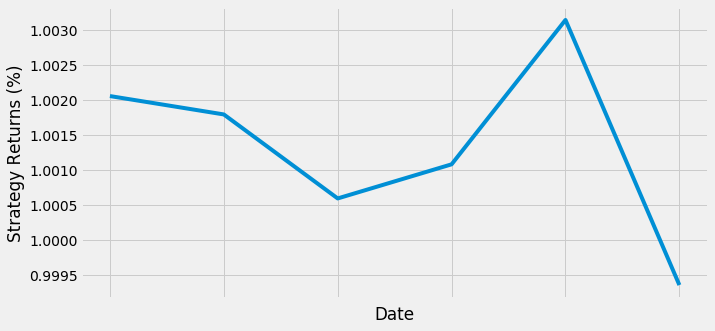


Train Accuracy: 91.67%
Test Accuracy: 51.88%


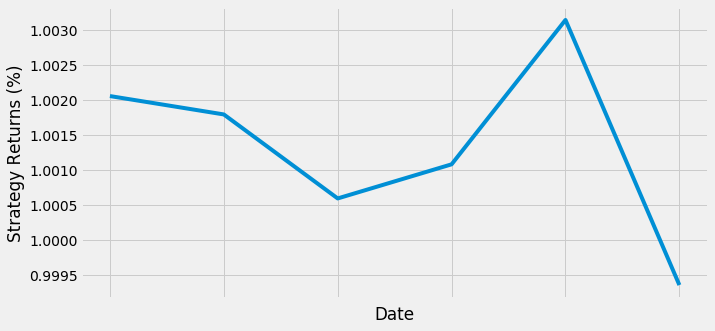


Train Accuracy: 66.67%
Test Accuracy: 49.58%


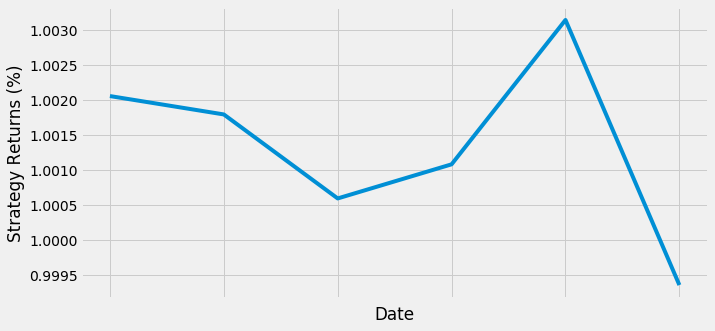


Train Accuracy: 70.59%
Test Accuracy: 49.15%


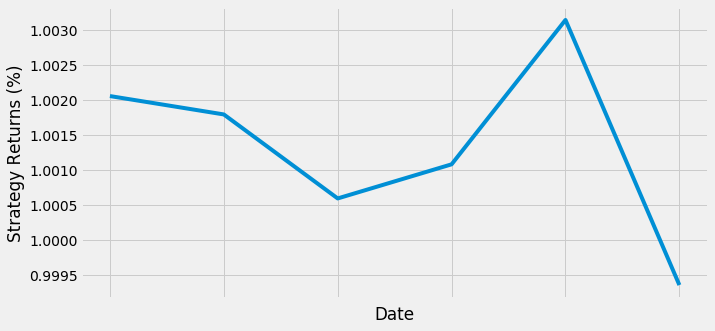


Train Accuracy: 65.00%
Test Accuracy: 49.35%


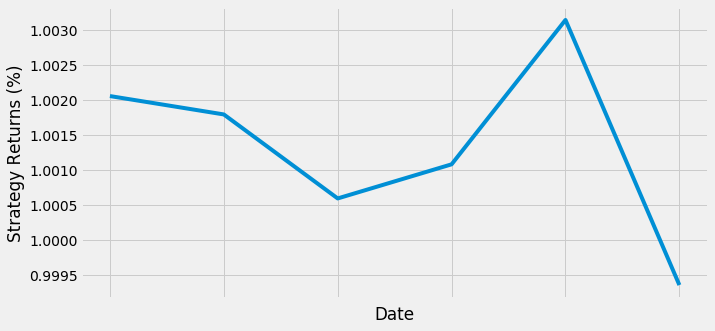


Train Accuracy: 63.64%
Test Accuracy: 49.78%


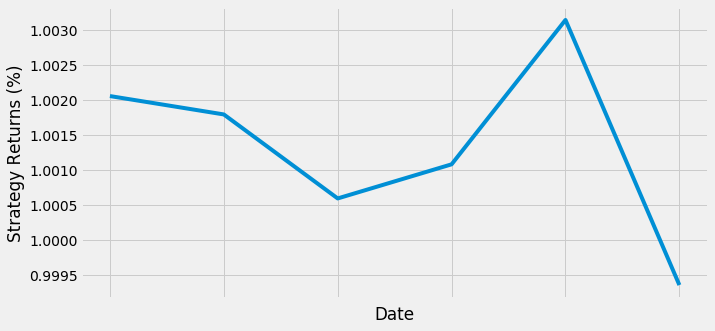


Train Accuracy: 64.00%
Test Accuracy: 49.12%


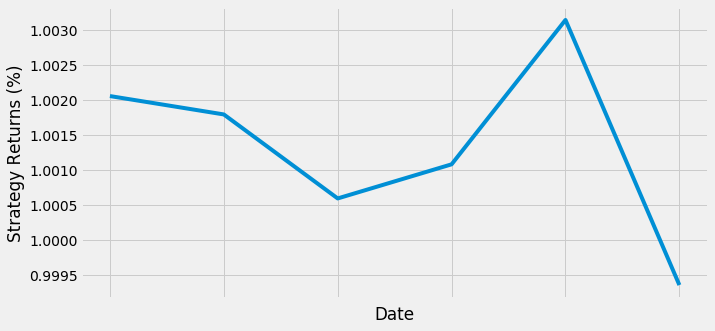


Train Accuracy: 59.26%
Test Accuracy: 55.36%


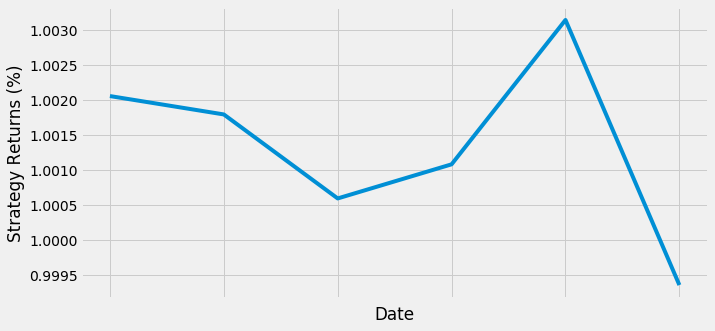


Train Accuracy: 60.00%
Test Accuracy: 56.11%


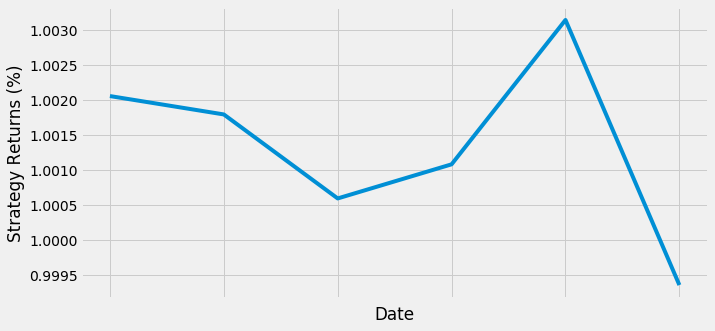


Train Accuracy: 59.38%
Test Accuracy: 56.16%


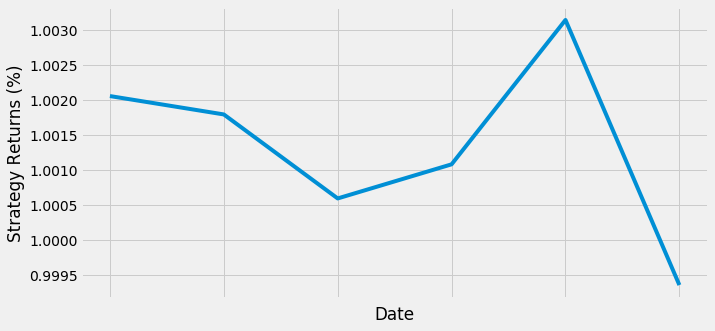


Train Accuracy: 60.00%
Test Accuracy: 56.02%


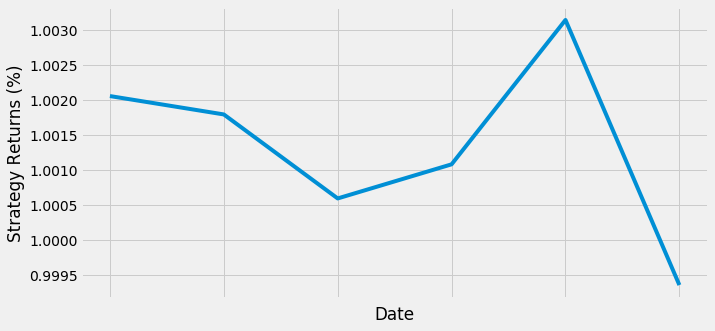


Train Accuracy: 62.16%
Test Accuracy: 55.61%


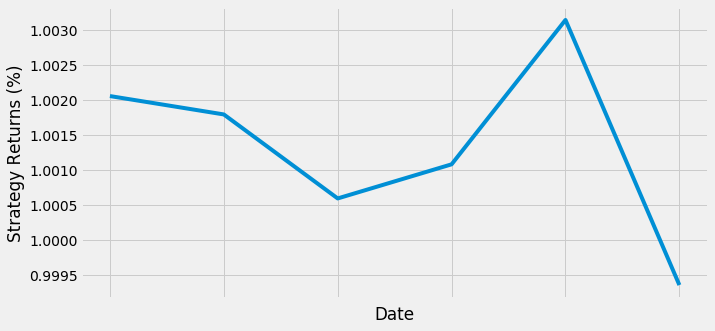


Train Accuracy: 60.00%
Test Accuracy: 55.92%


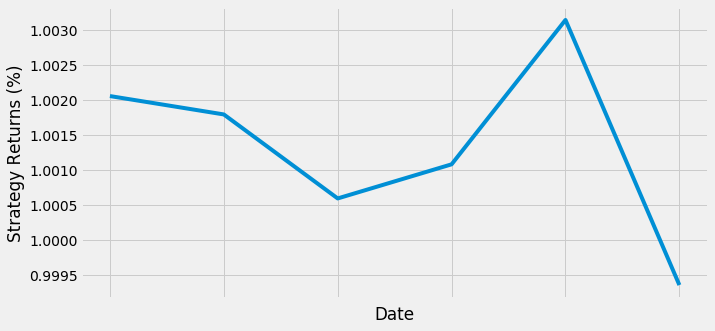


Train Accuracy: 59.52%
Test Accuracy: 55.98%


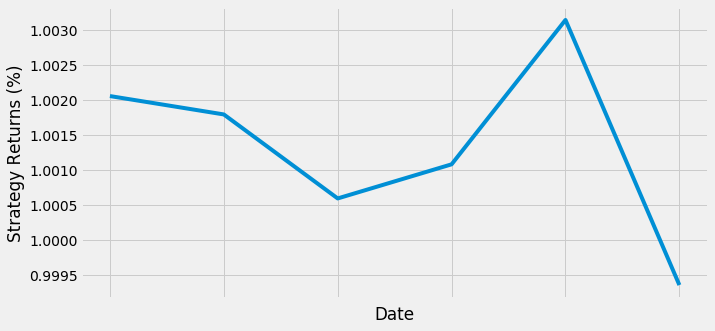


Train Accuracy: 57.78%
Test Accuracy: 56.31%


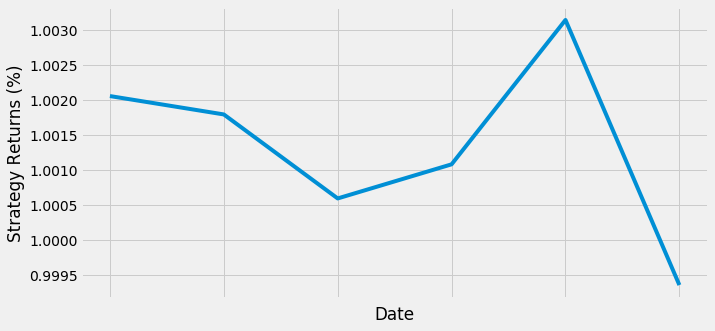


Train Accuracy: 59.57%
Test Accuracy: 55.88%


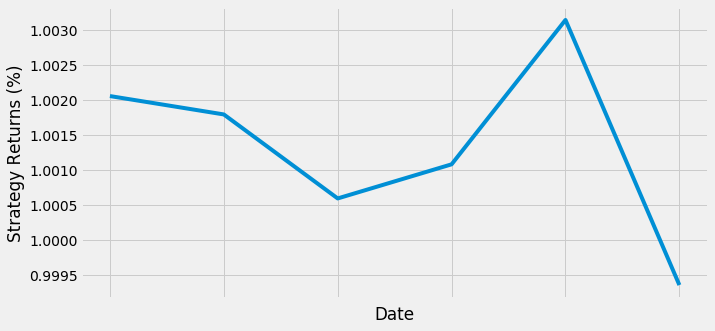


Train Accuracy: 66.00%
Test Accuracy: 57.21%


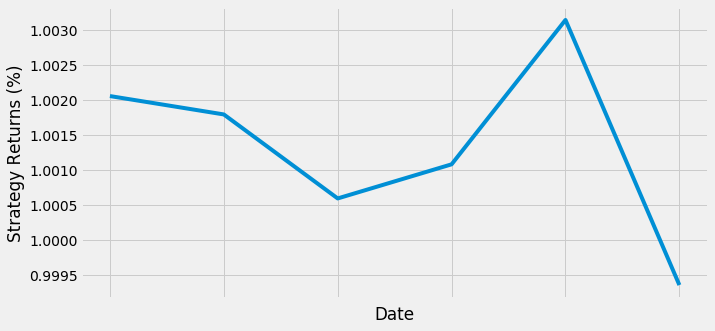


Train Accuracy: 67.31%
Test Accuracy: 55.28%


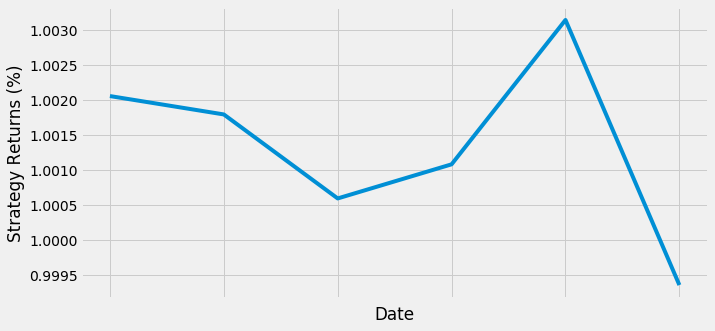


Train Accuracy: 65.45%
Test Accuracy: 51.02%


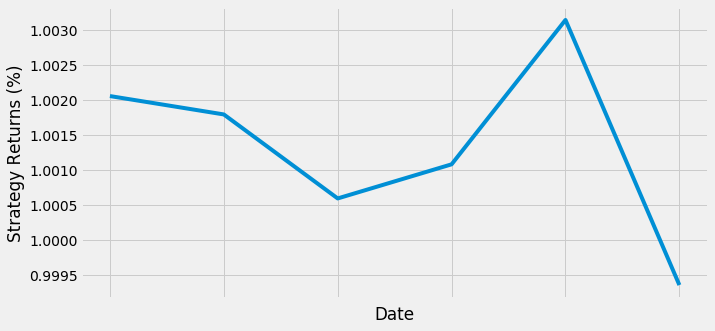


Train Accuracy: 59.65%
Test Accuracy: 54.12%


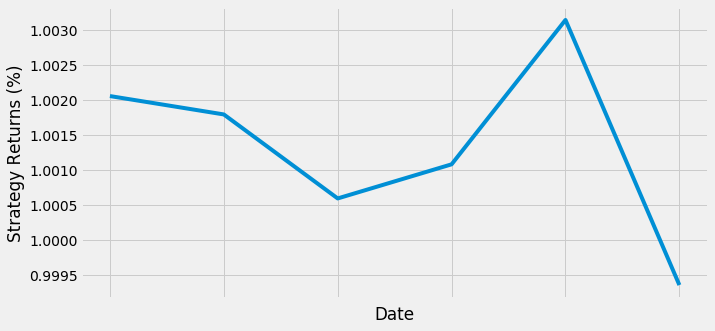


Train Accuracy: 55.00%
Test Accuracy: 57.07%


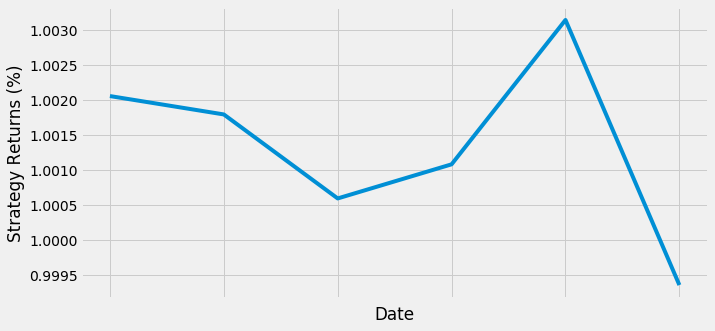


Train Accuracy: 61.29%
Test Accuracy: 50.79%


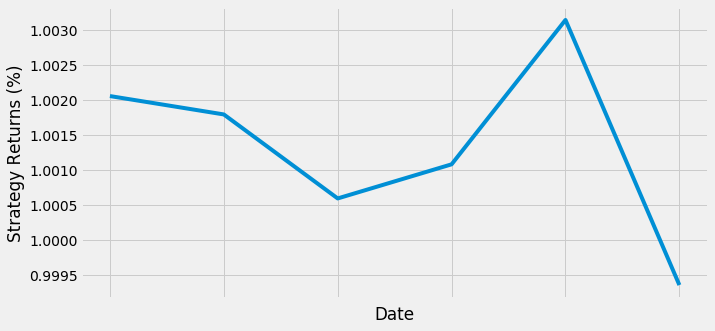


Train Accuracy: 63.08%
Test Accuracy: 48.39%


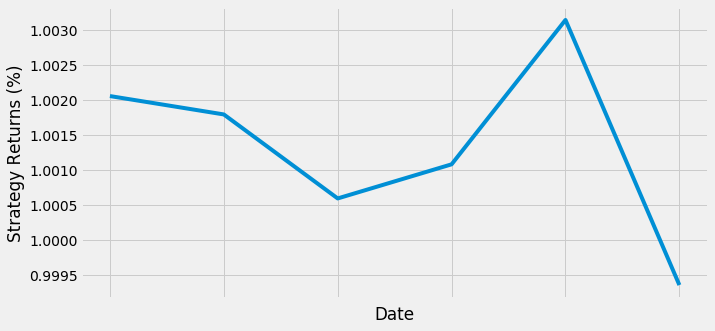


Train Accuracy: 58.21%
Test Accuracy: 49.46%


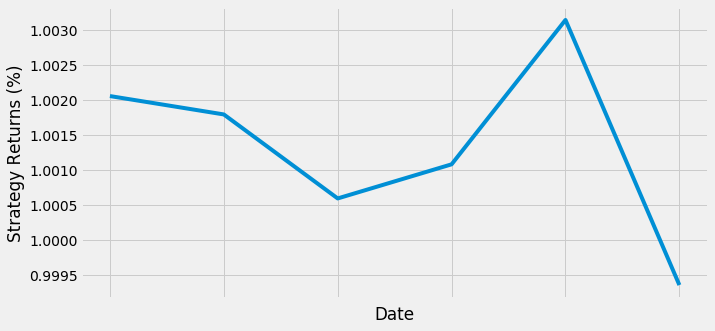


Train Accuracy: 57.14%
Test Accuracy: 50.83%


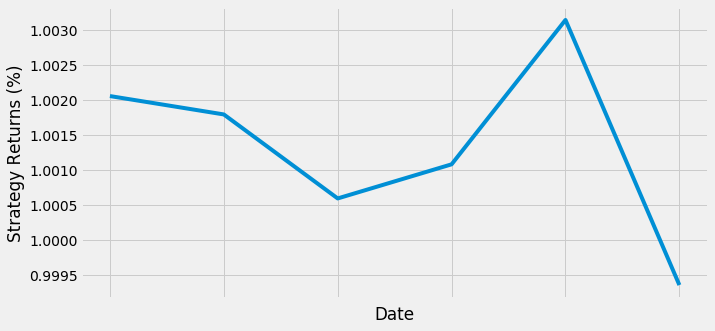


Train Accuracy: 61.11%
Test Accuracy: 50.84%


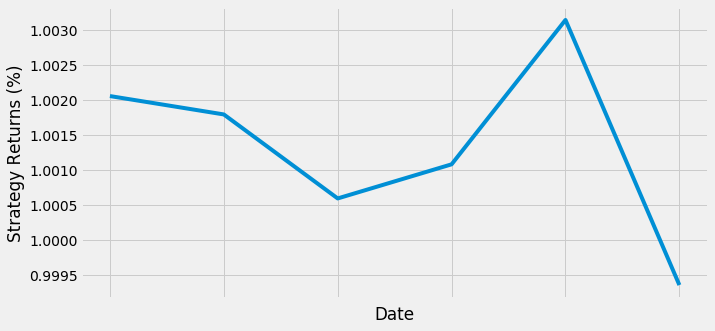


Train Accuracy: 62.67%
Test Accuracy: 48.30%


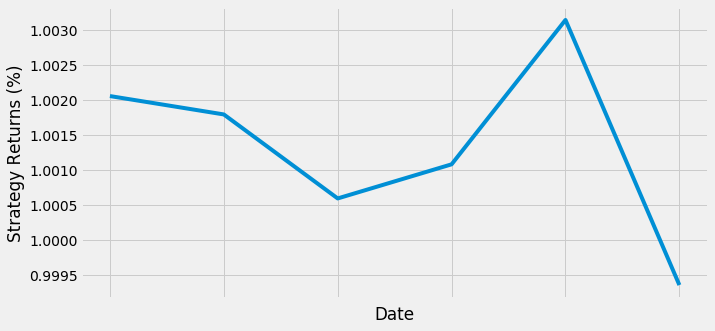


Train Accuracy: 62.34%
Test Accuracy: 50.00%


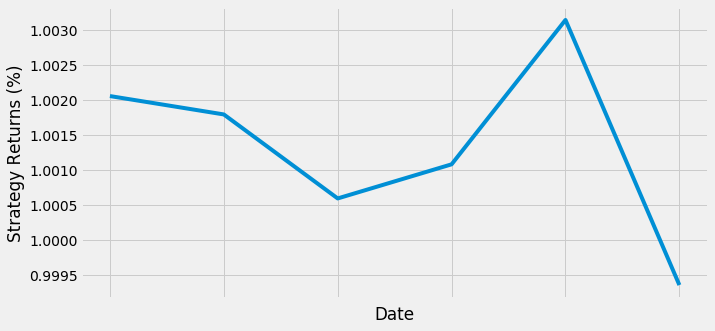


Train Accuracy: 62.50%
Test Accuracy: 49.12%


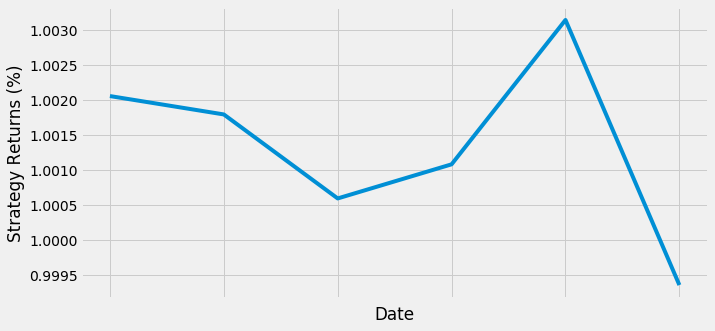


Train Accuracy: 62.20%
Test Accuracy: 49.70%


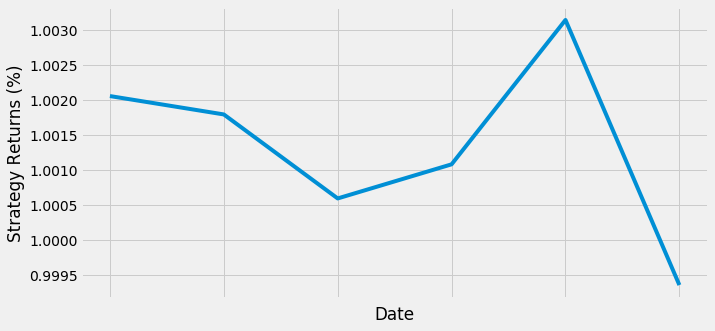


Train Accuracy: 62.35%
Test Accuracy: 50.60%


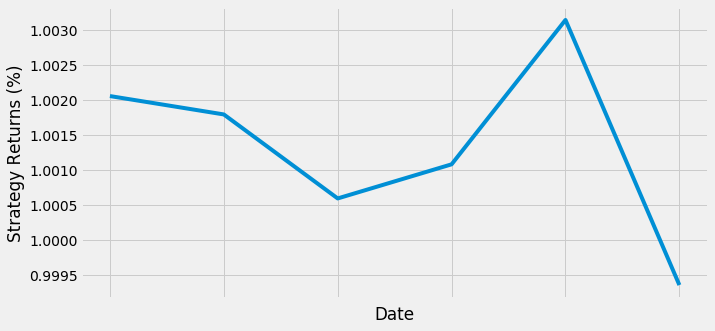


Train Accuracy: 62.07%
Test Accuracy: 50.00%


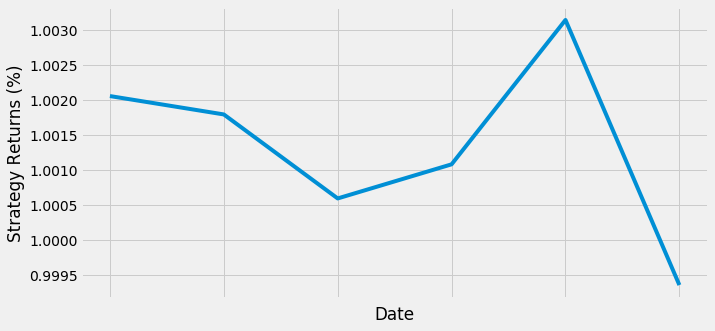


Train Accuracy: 63.33%
Test Accuracy: 48.45%


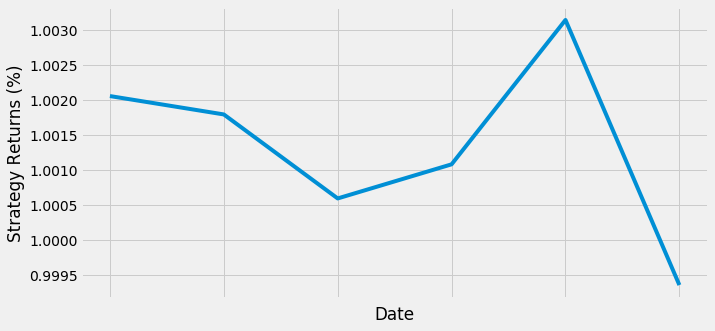


Train Accuracy: 63.04%
Test Accuracy: 48.43%


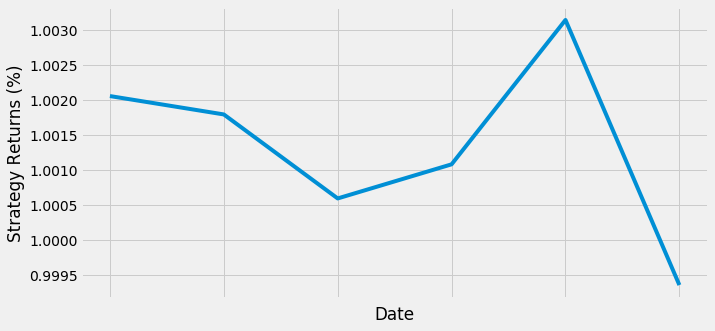


Train Accuracy: 62.11%
Test Accuracy: 47.44%


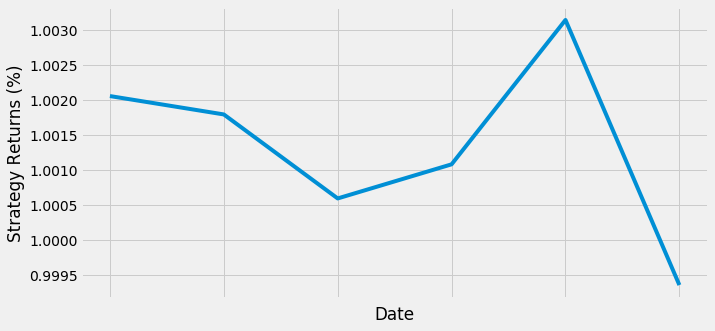


Train Accuracy: 60.82%
Test Accuracy: 49.35%


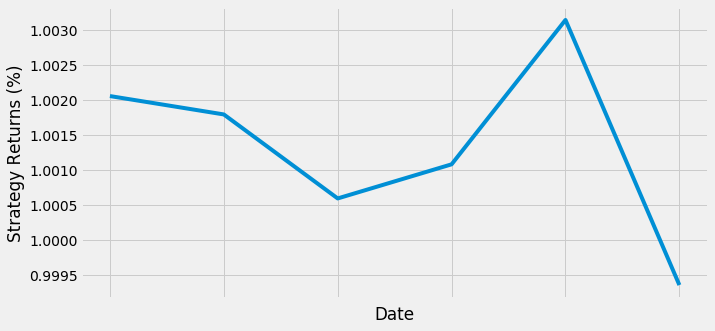


Train Accuracy: 62.00%
Test Accuracy: 49.67%


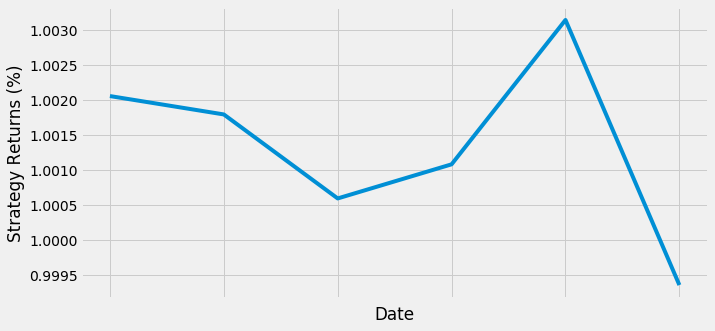


Train Accuracy: 60.78%
Test Accuracy: 48.99%


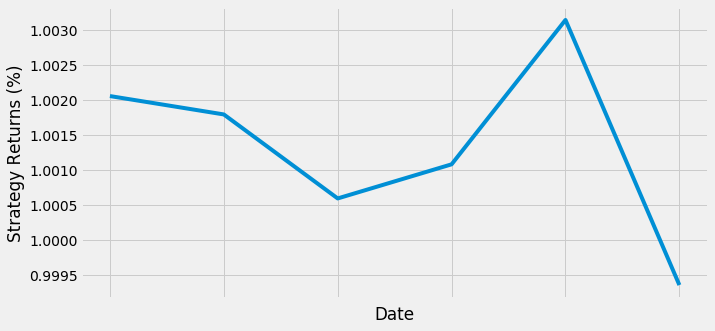


Train Accuracy: 60.95%
Test Accuracy: 47.26%


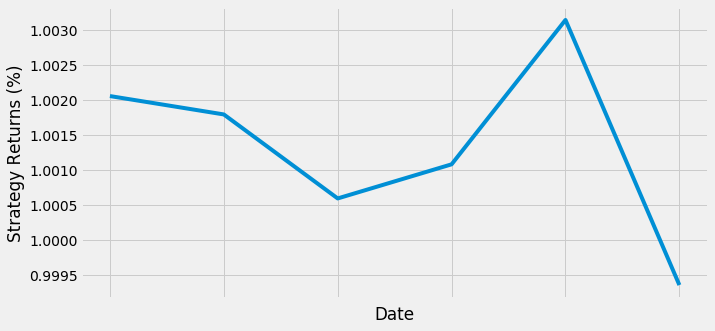


Train Accuracy: 60.75%
Test Accuracy: 47.92%


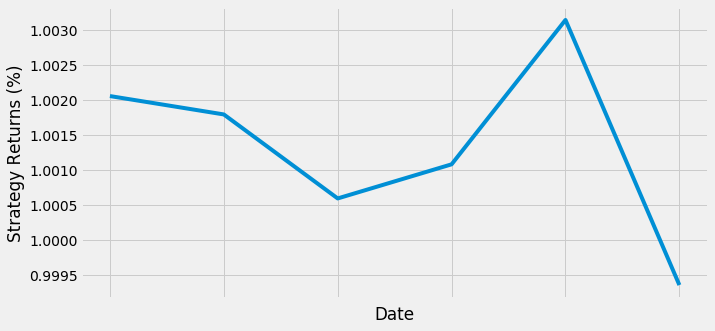


Train Accuracy: 60.00%
Test Accuracy: 47.52%


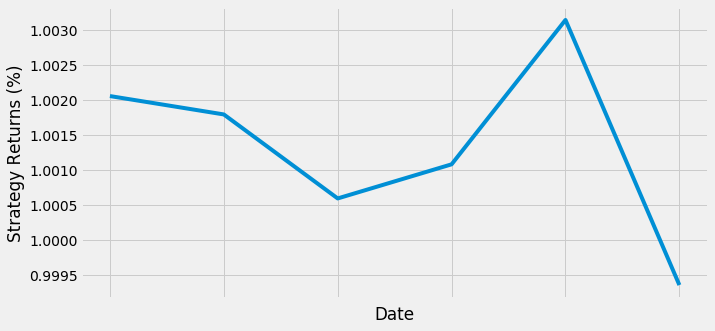


Train Accuracy: 58.93%
Test Accuracy: 47.48%


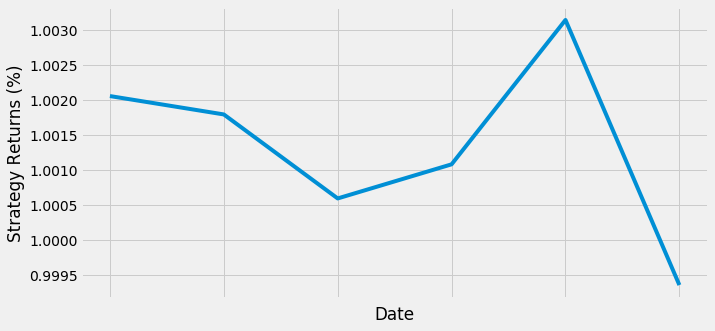


Train Accuracy: 57.39%
Test Accuracy: 47.06%


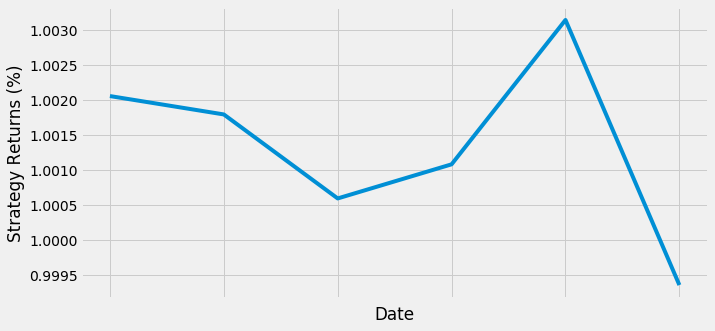


Train Accuracy: 55.56%
Test Accuracy: 46.27%


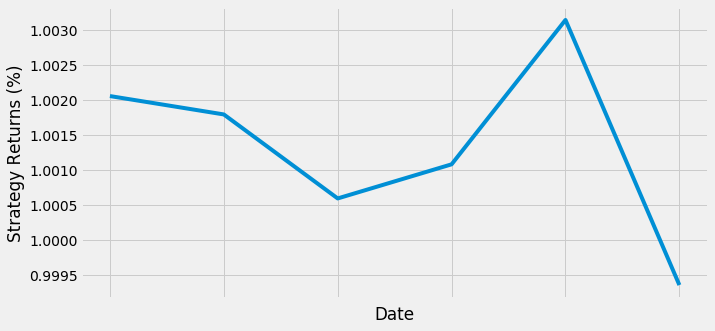


Train Accuracy: 56.67%
Test Accuracy: 48.09%


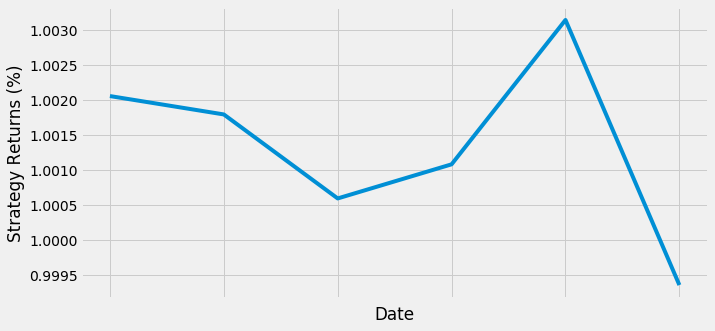


Train Accuracy: 54.10%
Test Accuracy: 47.29%


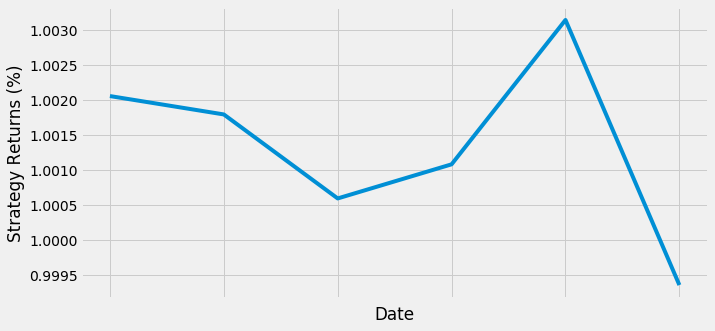


Train Accuracy: 59.20%
Test Accuracy: 48.41%


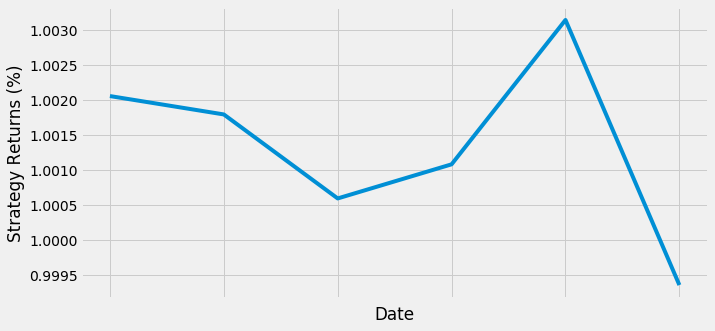


Train Accuracy: 57.81%
Test Accuracy: 47.15%


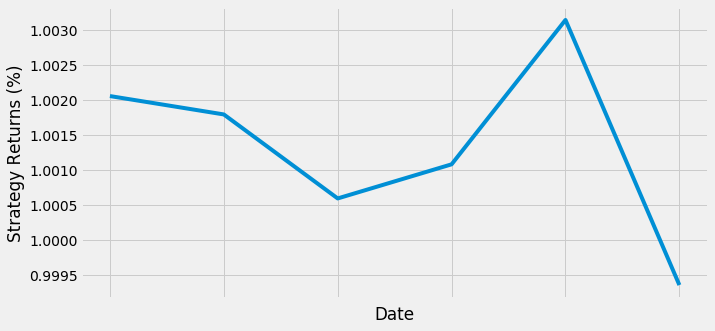


Train Accuracy: 55.38%
Test Accuracy: 45.45%


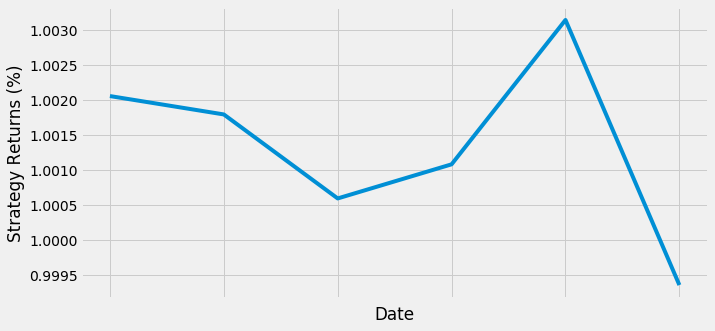


Train Accuracy: 59.40%
Test Accuracy: 47.46%


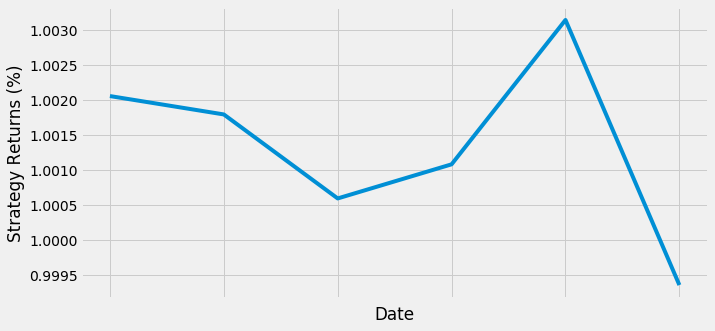


Train Accuracy: 59.26%
Test Accuracy: 50.00%


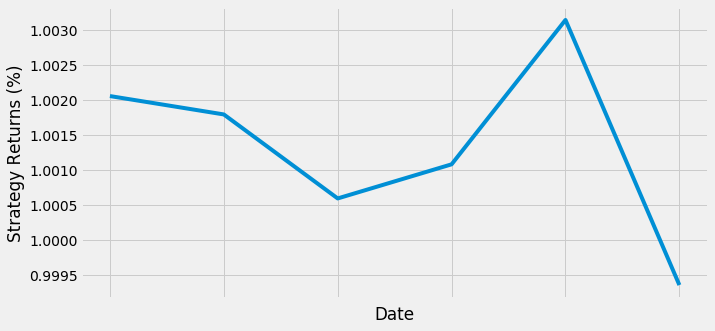


Train Accuracy: 57.97%
Test Accuracy: 48.67%


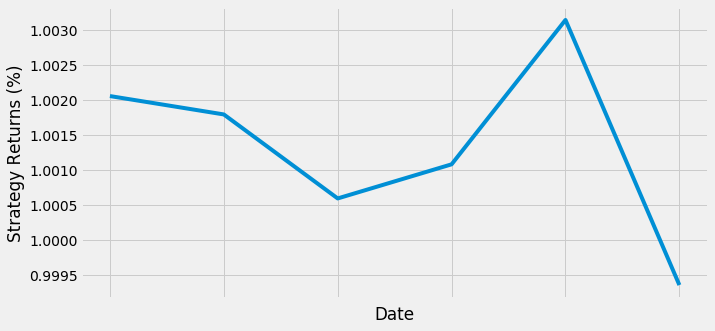


Train Accuracy: 57.86%
Test Accuracy: 50.45%


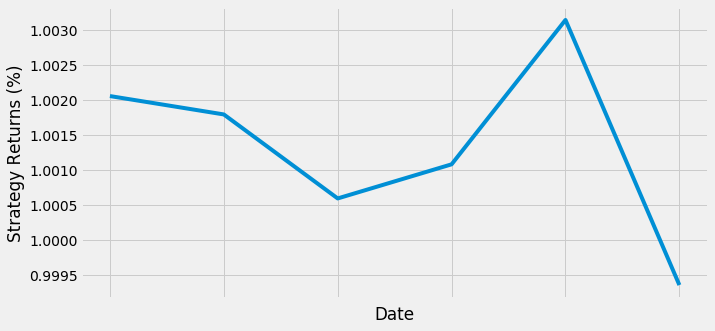


Train Accuracy: 56.64%
Test Accuracy: 51.85%


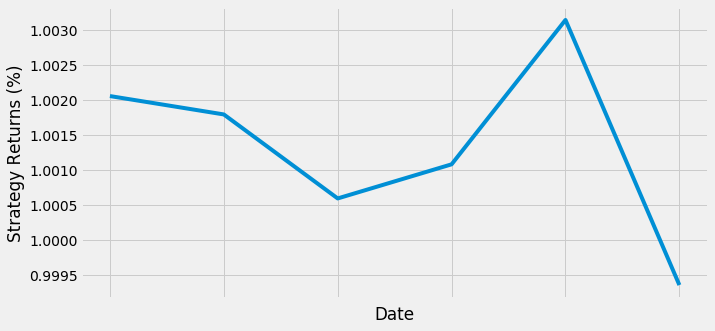


Train Accuracy: 57.93%
Test Accuracy: 51.89%


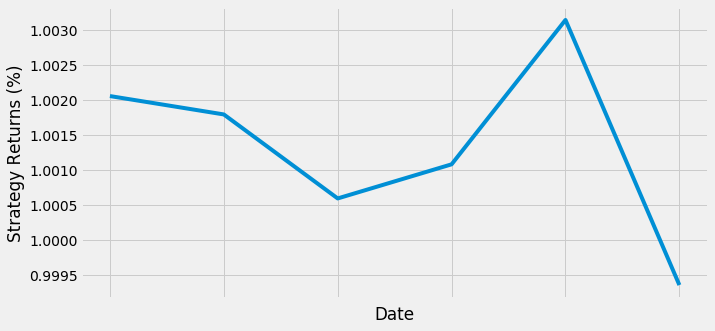


Train Accuracy: 58.78%
Test Accuracy: 55.34%


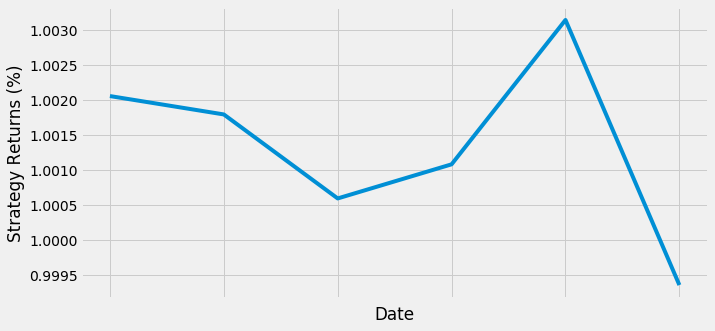


Train Accuracy: 58.67%
Test Accuracy: 53.47%


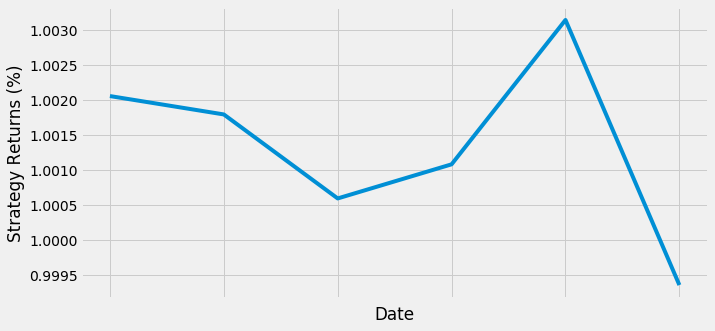


Train Accuracy: 58.82%
Test Accuracy: 51.02%


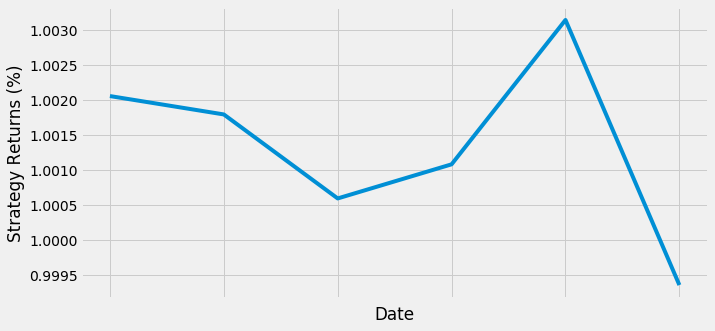


Train Accuracy: 61.29%
Test Accuracy: 54.17%


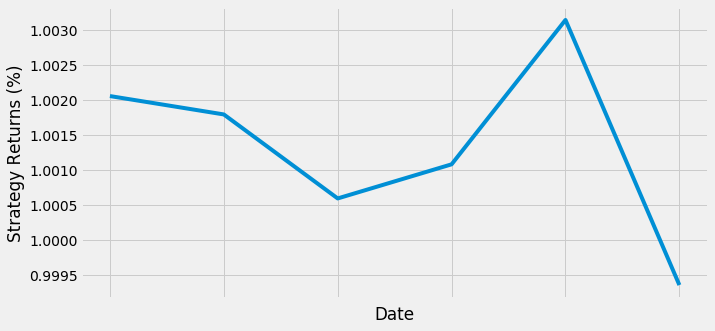


Train Accuracy: 60.76%
Test Accuracy: 54.84%


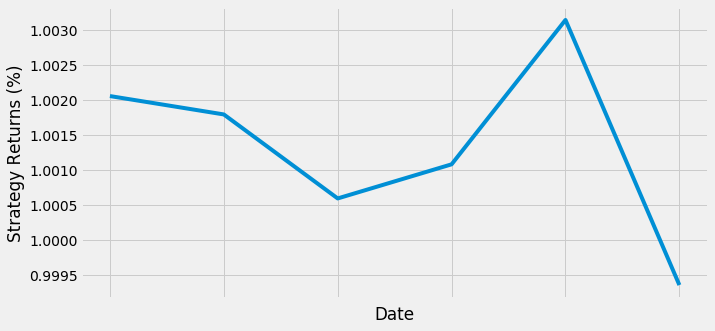


Train Accuracy: 60.62%
Test Accuracy: 53.85%


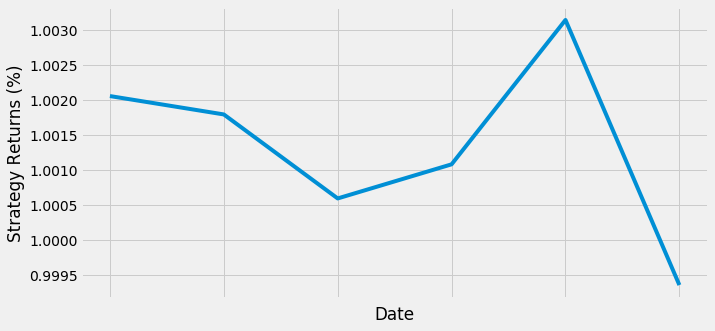


Train Accuracy: 60.74%
Test Accuracy: 52.27%


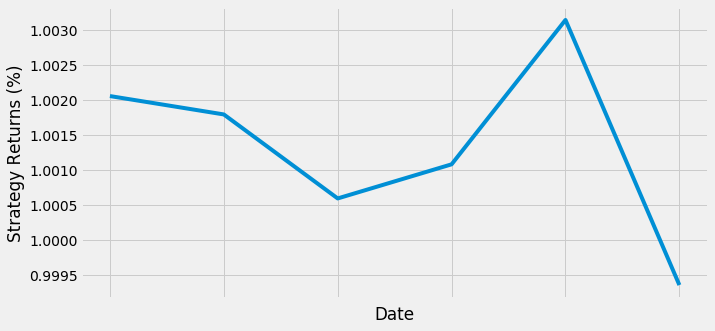


Train Accuracy: 61.82%
Test Accuracy: 51.16%


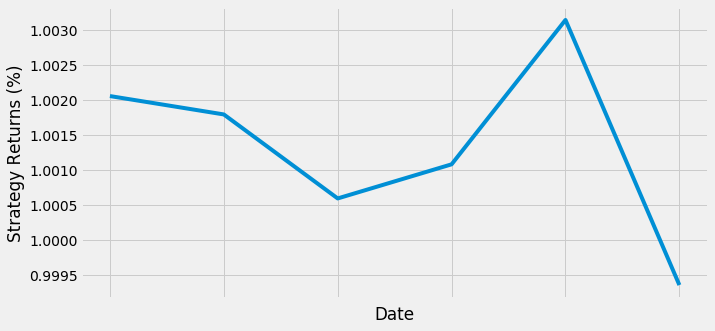


Train Accuracy: 58.93%
Test Accuracy: 46.99%


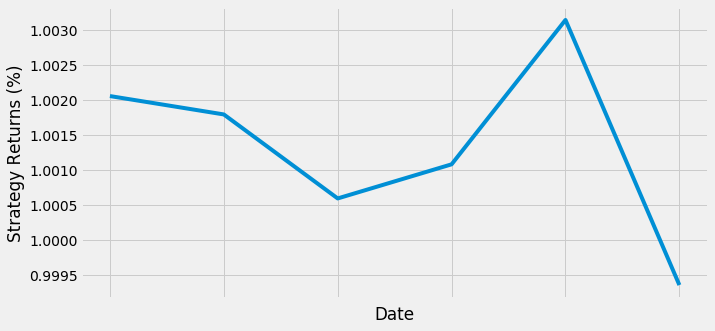


Train Accuracy: 61.18%
Test Accuracy: 46.91%


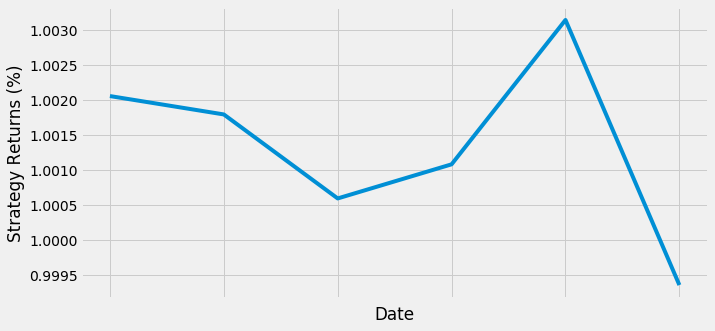


Train Accuracy: 60.12%
Test Accuracy: 47.44%


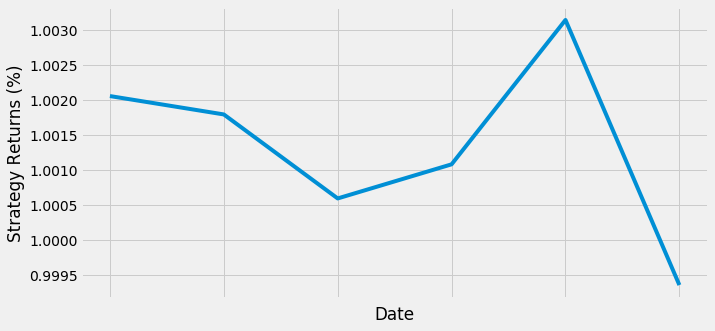


Train Accuracy: 59.43%
Test Accuracy: 48.68%


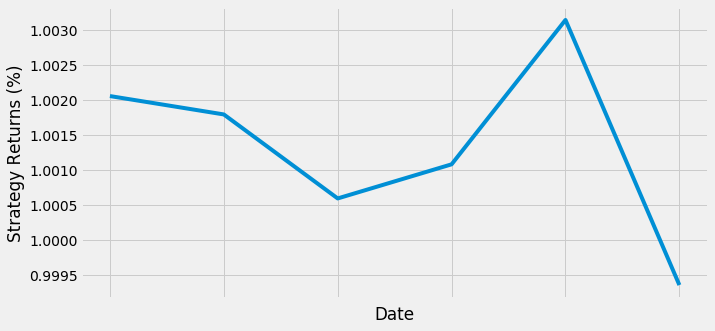


Train Accuracy: 58.43%
Test Accuracy: 54.79%


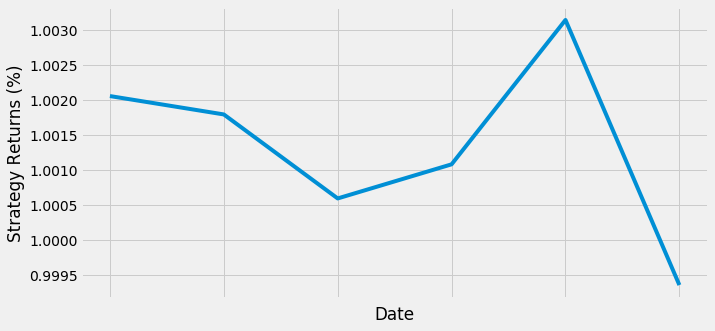


Train Accuracy: 55.56%
Test Accuracy: 57.75%


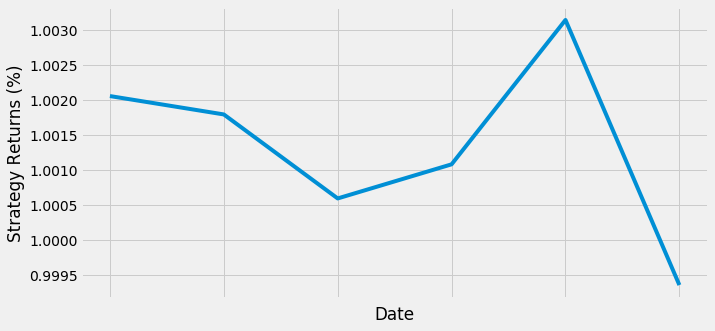


Train Accuracy: 56.83%
Test Accuracy: 51.47%


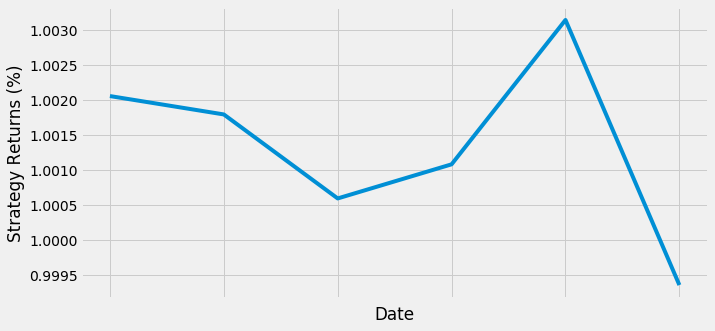


Train Accuracy: 60.00%
Test Accuracy: 54.55%


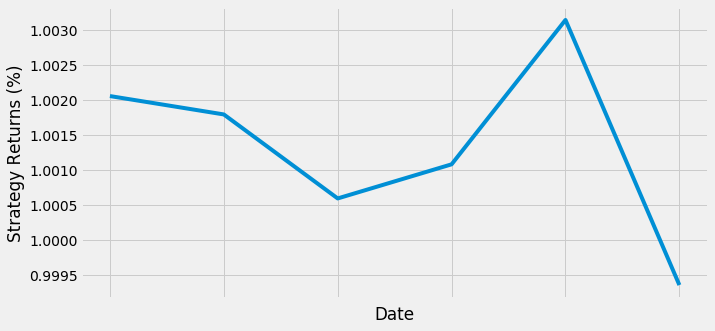


Train Accuracy: 55.85%
Test Accuracy: 58.73%


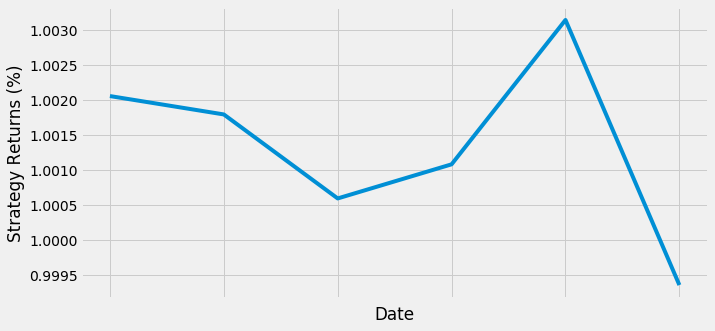


Train Accuracy: 56.32%
Test Accuracy: 57.38%


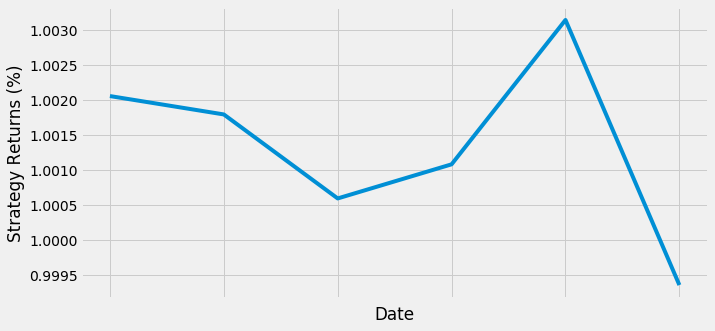


Train Accuracy: 55.96%
Test Accuracy: 58.62%


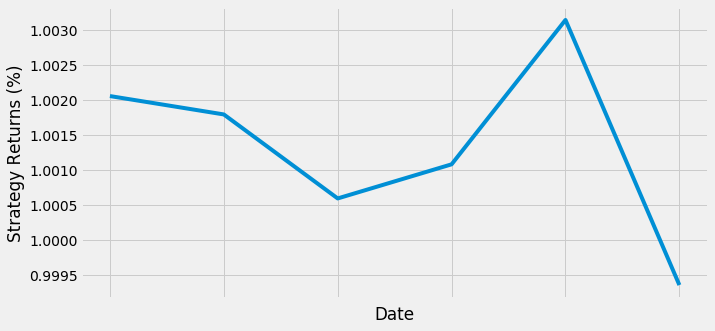


Train Accuracy: 56.41%
Test Accuracy: 57.14%


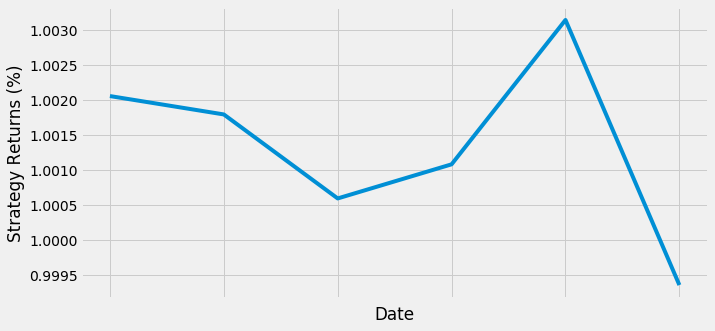


Train Accuracy: 56.57%
Test Accuracy: 56.60%


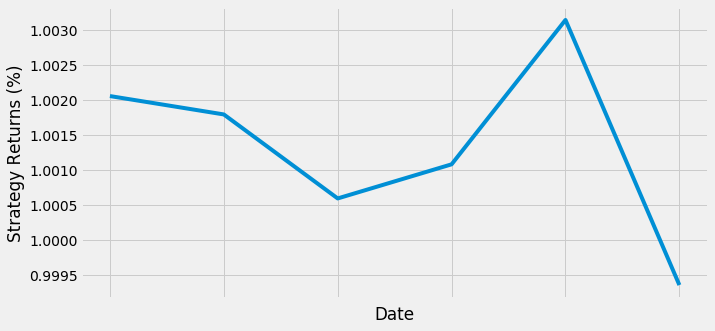


Train Accuracy: 57.00%
Test Accuracy: 54.90%


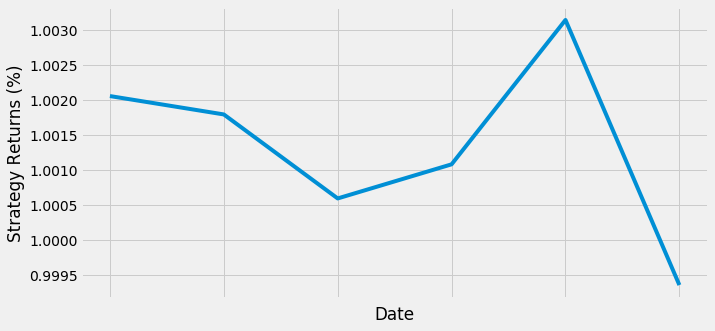


Train Accuracy: 57.14%
Test Accuracy: 54.17%


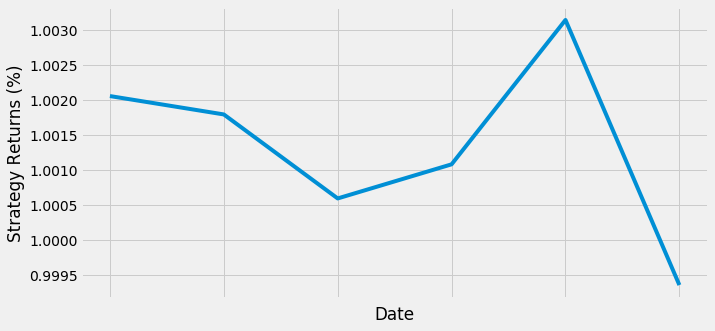


Train Accuracy: 57.07%
Test Accuracy: 54.35%


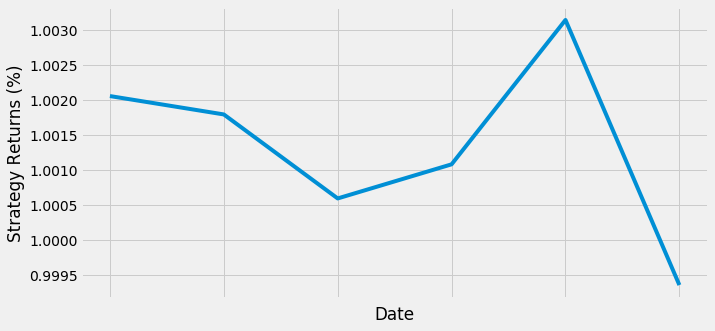


Train Accuracy: 57.21%
Test Accuracy: 53.49%


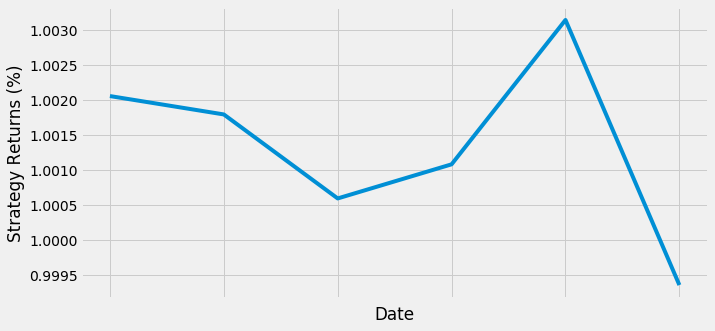


Train Accuracy: 57.62%
Test Accuracy: 51.22%


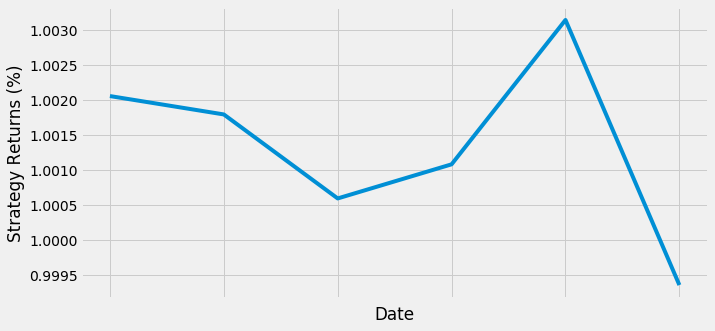


Train Accuracy: 58.22%
Test Accuracy: 47.37%


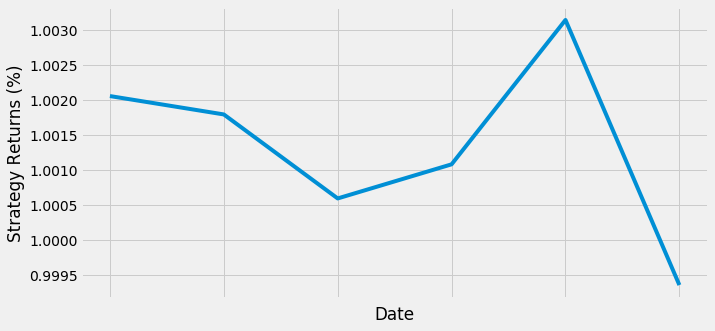


Train Accuracy: 58.14%
Test Accuracy: 47.22%


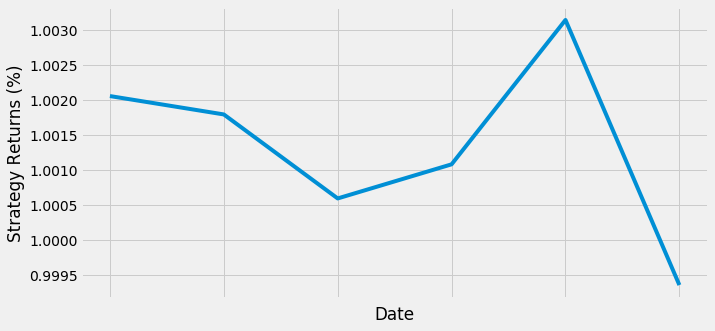


Train Accuracy: 57.80%
Test Accuracy: 48.48%


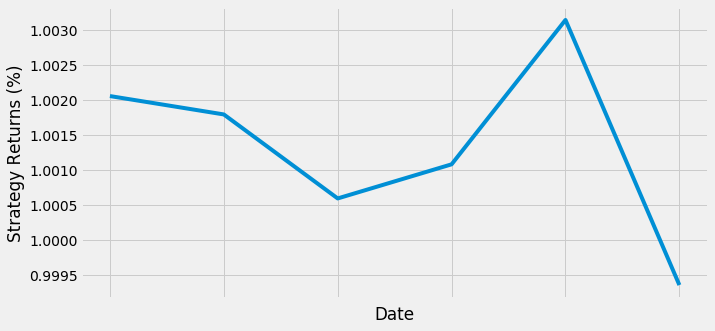


Train Accuracy: 57.27%
Test Accuracy: 51.61%


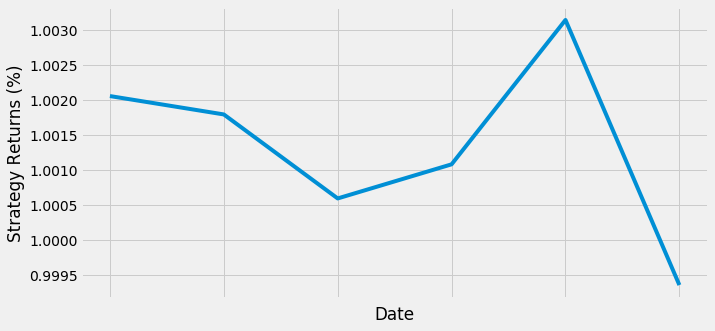


Train Accuracy: 57.40%
Test Accuracy: 42.86%


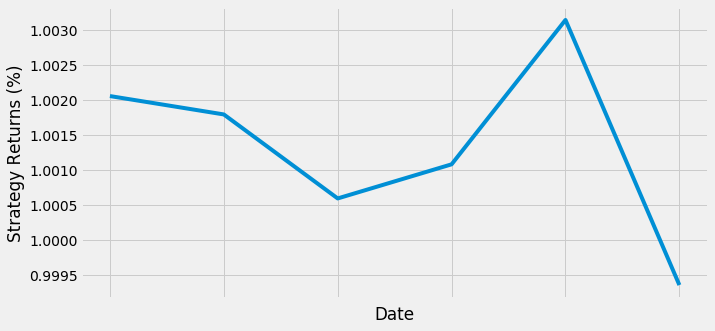


Train Accuracy: 59.11%
Test Accuracy: 46.15%


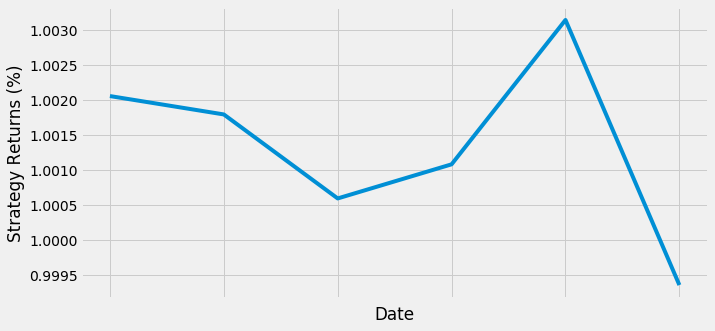


Train Accuracy: 59.21%
Test Accuracy: 43.48%


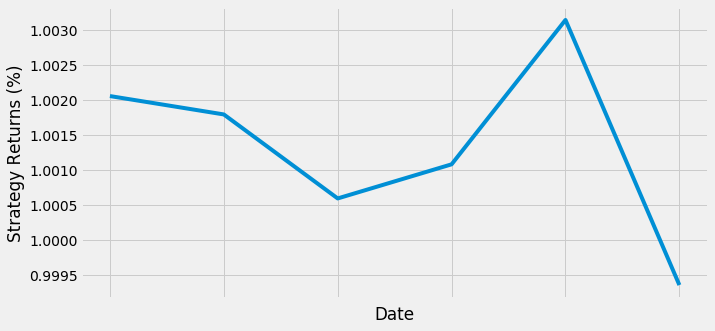


Train Accuracy: 59.13%
Test Accuracy: 42.86%


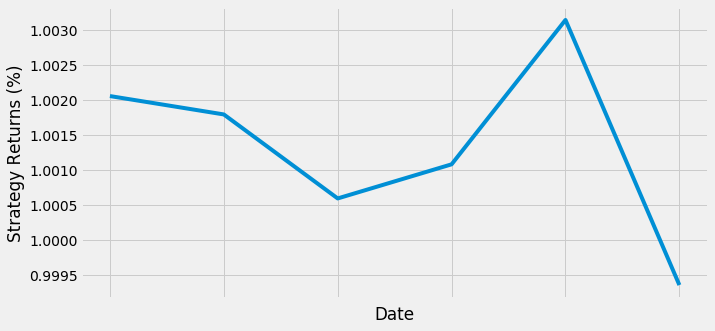


Train Accuracy: 60.09%
Test Accuracy: 44.44%


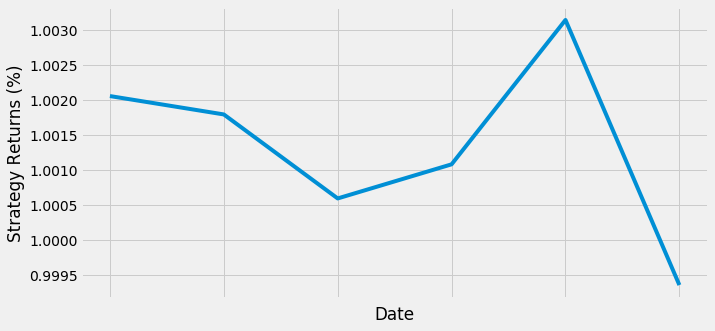


Train Accuracy: 60.43%
Test Accuracy: 37.50%


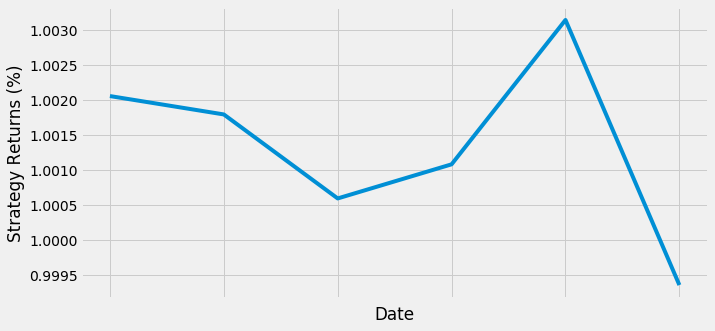


Train Accuracy: 57.98%
Test Accuracy: 30.77%


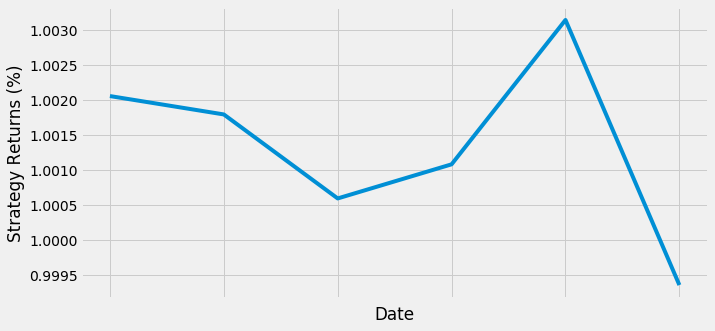


Train Accuracy: 57.50%
Test Accuracy: 36.36%


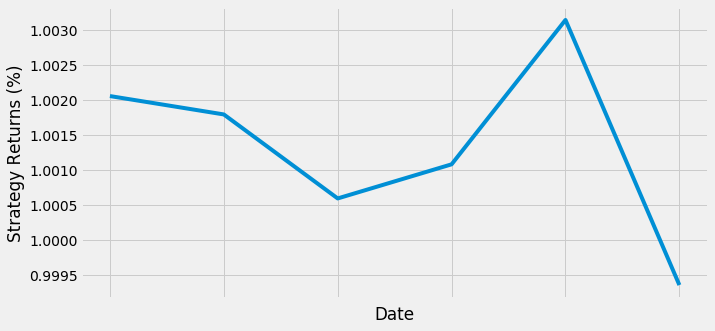


Train Accuracy: 58.02%
Test Accuracy: 37.50%


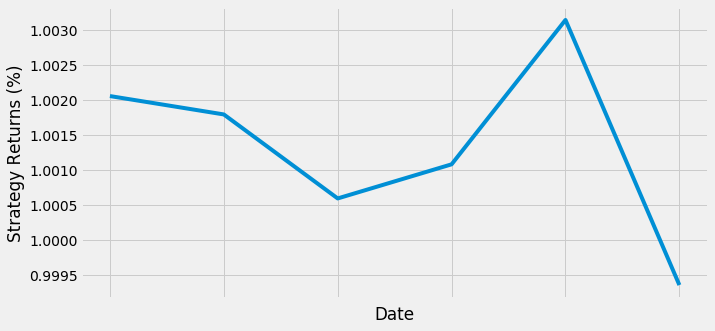


Train Accuracy: 58.78%
Test Accuracy: 33.33%


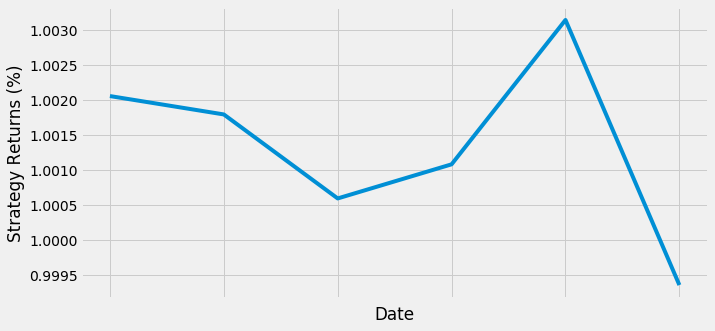

In [136]:
for x in range (1, 99):
    SVCmodel(x)
    outputSVCmodel()

Now this of course a lot of charts to sift through. Let's filter these to see what split percentage yields us the best strategy returns and the worst ones.

In [168]:
best_test = 0
worst_test = 0
best_split = 0
worst_split = 0

for x in range (1, 99):
    split_percentage = (x / 100)
    split = int(split_percentage*len(Df))

    # Train data set
    X_train = X[:split]
    y_train = y[:split] 

    # Test data set
    X_test = X[split:]
    y_test = y[split:]

    # Support vector classifier
    cls = SVC().fit(X_train, y_train)

    # train and test accuracy
    accuracy_train = accuracy_score(y_train, cls.predict(X_train))
    accuracy_test = accuracy_score(y_test, cls.predict(X_test))
    
    if accuracy_test > best_test:
        best_test = accuracy_test
        best_split = x
        
    elif accuracy_test < best_test:
        worst_test = accuracy_test
        worst_split = x

75
98


Best split is: 75%

Train Accuracy: 55.85%
Test Accuracy: 58.73%


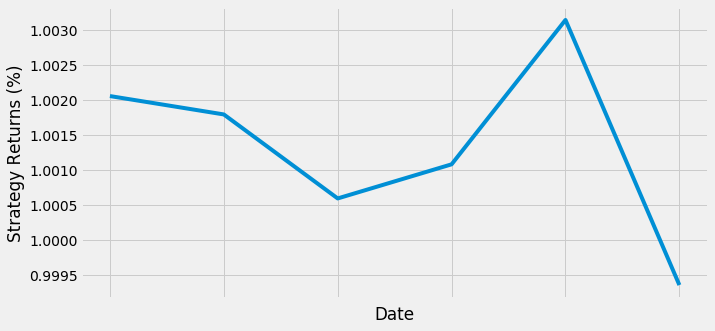

In [174]:
print ("Best split is: {0}%".format(best_split))
SVCmodel(best_split)
outputSVCmodel()

Worst split is: 75%

Train Accuracy: 58.78%
Test Accuracy: 33.33%


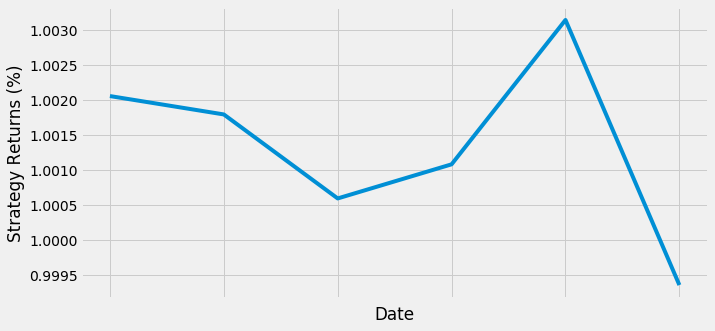

In [176]:
print ("Worst split is: {0}%".format(best_split))
SVCmodel(worst_split)
outputSVCmodel()

### Split Observations

Now what is interesting to note is the lesson that basing the performance of our SVC model off test accuracy alone is not sufficient. If we compare our best and worst split models, their graphs actually perform the same. This is despite the varying test accuracies. So let's implement the ROC AUC score metric and the log-loss metric to get a better sense of what split our SVCmodel is best performing at.

### ROC AUC and Log Loss Implementation

In [207]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

x = best_split
split_percentage = (x / 100)
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split] 

# Test data set
X_test = X[split:]
y_test = y[split:]

# Support vector classifier
cls = SVC().fit(X_train, y_train)

# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print("Our ROC AUC score: {0}".format(roc_auc_score(y_test, cls.predict(X_test), average=None)))
print("Our log loss score: {0}".format(log_loss(y_test, cls.predict(X_test))))

Our ROC AUC score: 0.5
Our log loss score: 14.254428187315286


In [208]:
x = worst_split
split_percentage = (x / 100)
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split] 

# Test data set
X_test = X[split:]
y_test = y[split:]

# Support vector classifier
cls = SVC().fit(X_train, y_train)

# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print("Our ROC AUC score: {0}".format(roc_auc_score(y_test, cls.predict(X_test), average=None)))
print("Our log loss score: {0}".format(log_loss(y_test, cls.predict(X_test))))

Our ROC AUC score: 0.5
Our log loss score: 23.02638399489392


### Score Observations

Looking to the scores, we find that the ROC AUC score is not applicable in this case to determine how well our model is performing. This is due to the graphs of both the best and worst splits being identical. So new new information can be interpreted from it. However, applying the log loss function paints a different story. 

We find that the best split has a lower log loss than the worst split. This indicates that our best split is actually performing better than the worst split. 